In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image =cv2.imread(r"/content/img.jpg")

In [4]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

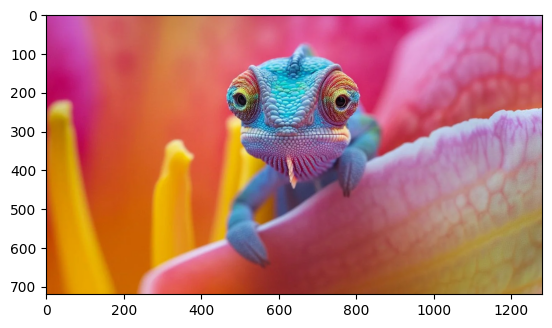

In [5]:
plt.imshow(image_rgb)
# plt.axis('off')  # Turn off axis numbers
plt.show()

### Custom Convolution Using a Kernel

In [ ]:
def apply_custom_convolution(image, kernel):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image_h, image_w = gray_image.shape
    kernel_h, kernel_w = kernel.shape

    pad_h, pad_w = kernel_h // 2, kernel_w // 2

    padded_image = np.pad(gray_image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    output_image = np.zeros_like(gray_image)

    for i in range(image_h):
        for j in range(image_w):
            region = padded_image[i:i + kernel_h, j:j + kernel_w]
            output_image[i, j] = np.sum(region * kernel)

    output_image = np.clip(output_image, 0, 255)

    return output_image

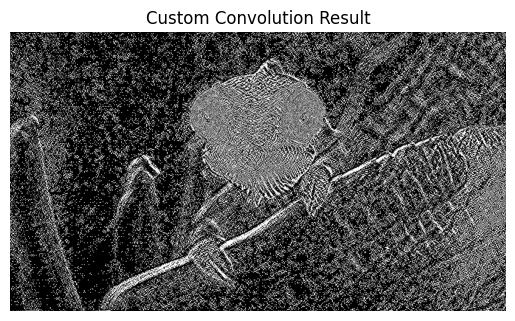

In [ ]:
sample_kernel = np.array([[1, 0, -1],
                          [0, 0, 0],
                          [-1, 0, 1]])

convolution_result = apply_custom_convolution(image_rgb, sample_kernel)

plt.imshow(convolution_result, cmap='gray')
plt.title('Custom Convolution Result')
plt.axis('off')
plt.show()
